# DS4420 FINAL PROJECT
### -- CHECKPOINT 2 --

Ryan Liang

In [1]:
import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

# For Preprocessing and Data manipulation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Model Imports
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

# Metric Imports

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score, 
    recall_score, 
    f1_score,
    log_loss
)
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error


# DATA IMPORT

In [2]:
data = pd.read_csv("data/MassShootingsDatasetVer5.csv")

In [3]:
# These columns weren't relevant or useful to the goal of the project
data = data.drop(columns=["Employed at", "S#"])

In [4]:
data

,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Mental Health Issues,Race,Gender,Latitude,Longitude
0,Texas church mass shooting,"Sutherland Springs, TX",11/5/17,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,20,46,0.0,26,NaN,No,White,M,NaN,NaN
1,Walmart shooting in suburban Denver,"Thornton, CO",11/1/17,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,0,3,0.0,47,NaN,No,White,M,NaN,NaN
2,Edgewood businees park shooting,"Edgewood, MD",10/18/17,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,3,6,0.0,37,NaN,No,Black,M,NaN,NaN
3,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/17,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,527,585,1.0,64,NaN,Unclear,White,M,36.181271,-115.134132
4,San Francisco UPS shooting,"San Francisco, CA",6/14/17,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,0.0,38,1.0,Yes,Asian,M,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,Clara Barton Elementary School,"Chicago, Illinois",1/17/74,Clara Barton Elementary School,Close,Teachers,anger,"On January 17, 1974, a 14-year-old student ent...",1,3,4,0.0,14,NaN,Yes,Unknown,Male,41.839280,-87.688181
319,New Orleans Police Shootings,"New Orleans, Louisiana",12/31/72,NaN,NaN,random,psycho,"On New Year's Eve in 1972, a 23-year-old ex-Na...",10,13,22,4.0,23,NaN,Yes,Black American or African American,Male,30.068724,-89.931474
320,St. Aloysius Church,"Spokane, Washington",11/11/71,Church,Close,random,terrorism,"On November 11, 1971, a former MIT student ent...",2,4,5,0.0,NaN,NaN,Yes,White American or European American,Male,47.673674,-117.415984
321,Rose-Mar College of Beauty,"Mesa, Arizona",11/12/66,Rose-Mar College of Beauty,Close,random,terrorism,"On November 12, 1966, an 18-year-old high scho...",5,1,6,0.0,18,NaN,Yes,White American or European American,Male,33.422687,-111.816320


# Data Processing

In [64]:
# For this project, I will encode the following as variables:
# - Gender as a binary variable where 0 = male and 1 = female. (a variable 2 means unknown)
# - Mental Health Issues as a binary variable where 0 = no health issues and 1 = health issues. (a variable 2 means unknown)
# - Race as a variable where:
# 0 = white, 1 = black, 2 = asian, 3 = latino, 4 = native american, 5 = 2+ races, 6 = unknown/some other race
# -------------------------------------------------------

races = []
genders = []
health = []

for column in data:
    if column == "Race":
        for row in data[column]:
            if row not in races:
                races.append(row)
    if column == "Gender":
        for row in data[column]:
            if row not in genders:
                genders.append(row)
    if column == 'Mental Health Issues':
        for row in data[column]:
            if row not in health:
                health.append(row)
    
races_df = []
genders_df = []
health_df = []
      
    
# ----- (1) ENCODING RACE AS A VARIABLE -----

for i in range(len(data)):    
    race_index = races.index(data['Race'][i])
        
    if race_index == 7 or race_index == 12 or race_index == 14:
        races_df.append(0)

    elif race_index == 6 or race_index == 11 or race_index == 15:
        races_df.append(1)
        
    elif race_index == 8 or race_index == 16:
        races_df.append(2)

    elif race_index == 13:
        races_df.append(4)
    
    elif race_index == 10:
        races_df.append(5)
        
    elif race_index == 3 or race_index == 5 or race_index == 9:
        races_df.append(6)
        
    else:
        races_df.append(race_index)
            
# ----- (2) ENCODING GENDER AS A VARIABLE -----

for i in range(len(data)):    
    gender_index = genders.index(data['Gender'][i])
        
    if gender_index == 2:
        genders_df.append(0)

    elif gender_index == 1 or gender_index == 3 or gender_index == 4:
        genders_df.append(2)
        
    elif gender_index == 5:
        genders_df.append(1)
        
    else:
        genders_df.append(gender_index)
        
# ----- (3) ENCODING MENTAL HEALTH AS A VARIABLE -----

for i in range(len(data)):    
    health_index = health.index(data['Mental Health Issues'][i])
        
    if health_index == 2:
        health_df.append(1)

    elif health_index == 1 or health_index == 3 or health_index == 4:
        health_df.append(2)
        
    else:
        health_df.append(health_index)
        
project_dict = {"Race":races_df, "Gender":genders_df, "Mental Health Issues":health_df, "Total victims":data["Total victims"]}
project_df = pd.DataFrame(data=project_dict)

In [65]:
project_df

,Race,Gender,Mental Health Issues,Total victims
0,0,0,0,46
1,0,0,0,3
2,1,0,0,6
3,0,0,2,585
4,2,0,1,5
...,...,...,...,...
318,1,0,1,4
319,0,0,1,22
320,2,0,1,5
321,2,0,1,6


In [66]:
# -- preprocessing / scaling -- #
        
# introduce the StandardScaler model to normalize/scale the data
scaler = StandardScaler()

# PROBLEM 1

In [8]:
# FEATURE PROBLEM 1 - predicting whether the shooter was male or female
# This will be considered a Classification task. Classify/predict whether the shooter was one or the other (binary)

In [9]:
# -- preprocessing / scaling (cont.) -- #

# create a copy of the project df for this specific problem
problem1_df = project_df

# get the indicies where the Gender was unknown
indicies = problem1_df[problem1_df['Gender'] == 2].index

# dropping values where Gender == 2 (the gender was unknown)
problem1_df = problem1_df.drop(indicies)

# reset the indicies so we don't get NaN values
problem1_df = problem1_df.reset_index(drop=True)

# transform the training and testing data to scale. drop non-numerical columns
scaled_data = scaler.fit_transform(problem1_df.drop(['Gender'], axis = 1))

# turn transformed/scaled data back into dataframes with header columns
scaled_df = pd.DataFrame(scaled_data, columns=problem1_df.columns.drop(['Gender']))
scaled_df['Gender'] = problem1_df['Gender']

# assign the features and target to the approriate columns/variables
features = scaled_df.drop(['Gender'], axis = 1)
target = scaled_df['Gender']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.65)

# scale the features 
X_train = StandardScaler().fit_transform(X_train.values)
X_test = StandardScaler().fit_transform(X_test.values)

## Model 1: Naive Bayes

In [11]:
# ----- MODEL 1: Naive Bayes ----- #

print("\n----- Naive Bayes -----")

nb = GaussianNB()
nb.fit(X_train, y_train)

# TRAINING
print("On Training Data:")
train_predict_label = nb.predict(X_train)

c_matrix = confusion_matrix(y_train, train_predict_label)

tp = c_matrix[1][1]
tn = c_matrix[0][0]

accuracy = (tp + tn) / (len(train_predict_label))
print("\nThe accuracy is: {}".format(accuracy))
print("The error is: {}\n".format(1-accuracy))

# TESTING
print("On Testing Data:")
test_predict_label = nb.predict(X_test)

c_matrix = confusion_matrix(y_test, test_predict_label)

tp = c_matrix[1][1]
tn = c_matrix[0][0]

accuracy = (tp + tn) / len(test_predict_label)
print("\nThe accuracy is: {}".format(accuracy))
print("The error is: {}\n".format(1-accuracy))


----- Naive Bayes -----
On Training Data:

The accuracy is: 0.9611650485436893
The error is: 0.03883495145631066

On Testing Data:

The accuracy is: 0.979381443298969
The error is: 0.020618556701030966



## Model 2: Logistic Regression

In [12]:
# ----- MODEL 2: Logistic Regression ----- #

lr = LogisticRegression()
lr.fit(X_train, y_train)

predict_label = lr.predict(X_test)

# ----- CONFUSION MATRIX ----- #

c_matrix = confusion_matrix(y_test, predict_label)

tp = c_matrix[1][1]
fp = c_matrix[0][1]
tn = c_matrix[0][0]
fn = c_matrix[1][0]

accuracy = (tp + tn) / len(predict_label)
print("\nThe accuracy is: {}".format(accuracy))
print("The error is: {}".format(1-accuracy))

# # avoid a division by 0 error
# if tp+fp > 0:
#     precision = (tp) / (tp + fp)
#     recall = (tp) / (tp + fn)
# else:
#     precision = 0
#     recall = 0
    
# # avoid a division by 0 error
# if precision+recall > 0:
#     f1 = 2 * (precision*recall) / (precision+recall)
# else:
#     f1 = 0
    
# print("\nThe precision is: {}".format(precision))
# print("The recall is: {}".format(recall))
# print("The F1 score is: {}".format(f1))


The accuracy is: 0.979381443298969
The error is: 0.020618556701030966


# PROBLEM 2

In [35]:
# FEATURE PROBLEM 2 - predicting whether the shooter had mental health issues
# This will be considered a Classification task. Classify/predict whether the shooter was one or the other (binary)

In [36]:
# -- preprocessing / scaling (cont.) -- #

# create a copy of the project df for this specific problem
problem2_df = project_df

# get the indicies where the Mental Health Issues were unknown
indicies = problem2_df[problem2_df['Mental Health Issues'] == 2].index

# dropping values where Mental Health Issues == 2 (the Mental Health Issues were unknown)
problem2_df = problem2_df.drop(indicies)

# reset the indicies so we don't get NaN values
problem2_df = problem2_df.reset_index(drop=True)

# transform the training and testing data to scale. drop non-numerical columns
scaled_data = scaler.fit_transform(problem2_df.drop(['Mental Health Issues'], axis = 1))

# turn transformed/scaled data back into dataframes with header columns
scaled_df = pd.DataFrame(scaled_data, columns=problem2_df.columns.drop(['Mental Health Issues']))
scaled_df['Mental Health Issues'] = problem2_df['Mental Health Issues']

# assign the features and target to the approriate columns/variables
features = scaled_df.drop(['Mental Health Issues'], axis = 1)
target = scaled_df['Mental Health Issues']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.7)

# scale the features 
X_train = StandardScaler().fit_transform(X_train.values)
X_test = StandardScaler().fit_transform(X_test.values)

## Model 1: Naive Bayes


----- Naive Bayes -----
On Training Data:

The accuracy is: 0.6610169491525424
The error is: 0.3389830508474576

On Testing Data:

The accuracy is: 0.6142857142857143
The error is: 0.3857142857142857

AUC= 0.6950992555831265


Text(0, 0.5, 'True Positive Rate')

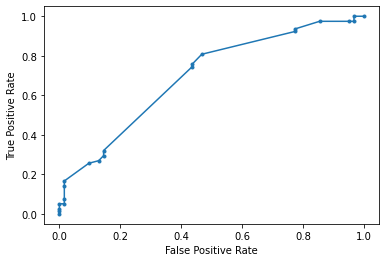

In [38]:
# ----- MODEL 1: Naive Bayes ----- #

print("\n----- Naive Bayes -----")

nb = GaussianNB()
nb.fit(X_train, y_train)

# TRAINING
print("On Training Data:")
train_predict_label = nb.predict(X_train)

c_matrix = confusion_matrix(y_train, train_predict_label)

tp = c_matrix[1][1]
tn = c_matrix[0][0]

accuracy = (tp + tn) / (len(train_predict_label))
print("\nThe accuracy is: {}".format(accuracy))
print("The error is: {}\n".format(1-accuracy))

# TESTING
print("On Testing Data:")
test_predict_label = nb.predict(X_test)

c_matrix = confusion_matrix(y_test, test_predict_label)

tp = c_matrix[1][1]
tn = c_matrix[0][0]

accuracy = (tp + tn) / len(test_predict_label)
print("\nThe accuracy is: {}".format(accuracy))
print("The error is: {}\n".format(1-accuracy))

# ROC and AUC

probabilities = nb.predict_proba(X_test)
probabilities = probabilities[:, 1]
r_auc = roc_auc_score(y_test, probabilities)
print("AUC=", r_auc)

fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, marker='.', label="naive bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## Model 2: Logistic Regression

In [39]:
# ----- MODEL 2: Logistic Regression ----- #

lr = LogisticRegression()
lr.fit(X_train, y_train)

predict_label = lr.predict(X_test)

# ----- CONFUSION MATRIX ----- #

c_matrix = confusion_matrix(y_test, predict_label)

tp = c_matrix[1][1]
fp = c_matrix[0][1]
tn = c_matrix[0][0]
fn = c_matrix[1][0]

accuracy = (tp + tn) / len(predict_label)
print("\nThe accuracy is: {}".format(accuracy))
print("The error is: {}".format(1-accuracy))

# avoid a division by 0 error
if tp+fp > 0:
    precision = (tp) / (tp + fp)
    recall = (tp) / (tp + fn)
else:
    precision = 0
    recall = 0
    
# avoid a division by 0 error
if precision+recall > 0:
    f1 = 2 * (precision*recall) / (precision+recall)
else:
    f1 = 0
    
print("\nThe precision is: {}".format(precision))
print("The recall is: {}".format(recall))
print("The F1 score is: {}".format(f1))


The accuracy is: 0.5642857142857143
The error is: 0.4357142857142857

The precision is: 0.7428571428571429
The recall is: 0.3333333333333333
The F1 score is: 0.4601769911504425


## Model 3: kNearest Neighbors 

In [18]:
# ----- MODEL 3: kNN ----- #

print("----- kNN -----")

ks = [2, 3, 4, 5, 6, 7, 8, 9, 10]
max_accuracy = 0
max_k = 0

for k in ks:
    
    print("k is: {}".format(k))
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    predict_label = knn.predict(X_test)
    
    c_matrix = confusion_matrix(y_test, predict_label)

    tp = c_matrix[1][1]
    fp = c_matrix[0][1]
    tn = c_matrix[0][0]
    fn = c_matrix[1][0]

    accuracy = (tp + tn) / len(predict_label)
    
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_k = k
    
    print("The accuracy is: {}".format(accuracy))
    print("The error is: {}\n".format(1-accuracy))
    
print("The k with the highest accuracy is {} with an accuracy of {}".format(max_k, max_accuracy))

----- kNN -----
k is: 2
The accuracy is: 0.4785714285714286
The error is: 0.5214285714285714

k is: 3
The accuracy is: 0.45714285714285713
The error is: 0.5428571428571429

k is: 4
The accuracy is: 0.45
The error is: 0.55

k is: 5
The accuracy is: 0.4785714285714286
The error is: 0.5214285714285714

k is: 6
The accuracy is: 0.45714285714285713
The error is: 0.5428571428571429

k is: 7
The accuracy is: 0.5071428571428571
The error is: 0.4928571428571429

k is: 8
The accuracy is: 0.5357142857142857
The error is: 0.4642857142857143

k is: 9
The accuracy is: 0.5428571428571428
The error is: 0.4571428571428572

k is: 10
The accuracy is: 0.5142857142857142
The error is: 0.48571428571428577

The k with the highest accuracy is 9 with an accuracy of 0.5428571428571428


# PROBLEM 3

In [19]:
# FEATURE PROBLEM 3 - predicting the race of the shooter
# This will be considered a Classification task. Classify/predict the class of the shooter (class = race)

In [20]:
# -- preprocessing / scaling (cont.) -- #

# create a copy of the project df for this specific problem
problem3_df = project_df

# get the indicies where the Mental Health Issues were unknown
indicies = problem3_df[problem3_df['Race'] == 6].index

# dropping values where Mental Health Issues == 2 (the Mental Health Issues were unknown)
problem3_df = problem3_df.drop(indicies)

# reset the indicies so we don't get NaN values
problem3_df = problem3_df.reset_index(drop=True)

# transform the training and testing data to scale. drop non-numerical columns
scaled_data = scaler.fit_transform(problem3_df.drop(['Race'], axis = 1))

# turn transformed/scaled data back into dataframes with header columns
scaled_df = pd.DataFrame(scaled_data, columns=problem3_df.columns.drop(['Race']))
scaled_df['Race'] = problem3_df['Race']

# assign the features and target to the approriate columns/variables
features = scaled_df.drop(['Race'], axis = 1)
target = scaled_df['Race']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5)

# scale the features 
X_train = StandardScaler().fit_transform(X_train.values)
X_test = StandardScaler().fit_transform(X_test.values)

## Model 1: kNearest Neighbors 

In [22]:
# ----- MODEL 1: kNN ----- #

print("----- kNN -----")

ks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 50]
max_accuracy = 0
max_k = 0

for k in ks:
    
    print("k is: {}".format(k))
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    predict_label = knn.predict(X_test)
    
    c_matrix = confusion_matrix(y_test, predict_label)

    tp = c_matrix[1][1]
    fp = c_matrix[0][1]
    tn = c_matrix[0][0]
    fn = c_matrix[1][0]

    accuracy = (tp + tn) / len(predict_label)
    
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_k = k
    
    print("The accuracy is: {}".format(accuracy))
    print("The error is: {}\n".format(1-accuracy))
    
print("The k with the highest accuracy is {} with an accuracy of {}".format(max_k, max_accuracy))

----- kNN -----
k is: 2
The accuracy is: 0.2532467532467532
The error is: 0.7467532467532467

k is: 3
The accuracy is: 0.24675324675324675
The error is: 0.7532467532467533

k is: 4
The accuracy is: 0.24025974025974026
The error is: 0.7597402597402597

k is: 5
The accuracy is: 0.24025974025974026
The error is: 0.7597402597402597

k is: 6
The accuracy is: 0.24025974025974026
The error is: 0.7597402597402597

k is: 7
The accuracy is: 0.13636363636363635
The error is: 0.8636363636363636

k is: 8
The accuracy is: 0.18181818181818182
The error is: 0.8181818181818181

k is: 9
The accuracy is: 0.14935064935064934
The error is: 0.8506493506493507

k is: 10
The accuracy is: 0.18181818181818182
The error is: 0.8181818181818181

k is: 50
The accuracy is: 0.18831168831168832
The error is: 0.8116883116883117

The k with the highest accuracy is 2 with an accuracy of 0.2532467532467532


## Model 2: Support Vector Machine

In [23]:
# ----- MODEL 2: SVM ----- #

svm = SVC()
svm.fit(X_train, y_train)
predict_label = svm.predict(X_test)

c_matrix = confusion_matrix(y_test, predict_label)

tp = c_matrix[1][1]
fp = c_matrix[0][1]
tn = c_matrix[0][0]
fn = c_matrix[1][0]

accuracy = (tp + tn) / len(predict_label)

if accuracy > max_accuracy:
    max_accuracy = accuracy
    max_k = k

print("The accuracy is: {}".format(accuracy))
print("The error is: {}".format(1-accuracy))


The accuracy is: 0.2077922077922078
The error is: 0.7922077922077921


# PROBLEM 4

In [67]:
# FEATURE PROBLEM 4 - what is considered a mass shooting?
# This will be considered a Regression task. 
# Predicting the # of victims of a mass shooting

In [68]:
# -- preprocessing / scaling (cont.) -- #

# create a copy of the project df for this specific problem
problem4_df = project_df

# transform the training and testing data to scale. drop non-numerical columns
scaled_data = scaler.fit_transform(problem4_df.drop(['Total victims'], axis = 1))

# turn transformed/scaled data back into dataframes with header columns
scaled_df = pd.DataFrame(scaled_data, columns=problem4_df.columns.drop(['Total victims']))
scaled_df['Total victims'] = problem4_df['Total victims']

# assign the features and target to the approriate columns/variables
features = scaled_df.drop(['Total victims'], axis = 1)
target = scaled_df['Total victims']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5)

# scale the features 
X_train = StandardScaler().fit_transform(X_train.values)
X_test = StandardScaler().fit_transform(X_test.values)

# Model 1: Linear Regression

In [73]:
# ----- MODEL 1: Linear Regression ----- #

mlr = LinearRegression()
mlr.fit(X_train, y_train)

# retrieve the coefficients of the data
coeff_df = pd.DataFrame(mlr.coef_, problem4_df.columns.drop(["Total victims"]), columns=["Coefficient"])

y_train_predict = mlr.predict(X_train)
mse = mean_squared_error(y_train, y_train_predict)

print("On Training Data:")
print("\nThe MSE is {}".format(mse))
print("The RMSE is {}\n".format(math.sqrt(mse)))

y_test_predict = mlr.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)

print("On Testing Data:")
print("\nThe MSE is {}".format(mse))
print("The RMSE is {}\n".format(math.sqrt(mse)))

On Training Data:

The MSE is 2101.6067217792
The RMSE is 45.84328436946027

On Testing Data:

The MSE is 175.3739841254949
The RMSE is 13.24288428271934



In [74]:
coeff_df

,Coefficient
Race,-3.141506
Gender,-2.550480
Mental Health Issues,3.861922


# MORE DATA PROCESSING
### More processing of data for regression tasks, to transform them into Classifcation tasks, and so we can work with more variables

In [48]:
# For this task, I will encode the following:
# - Total victims as a variable where:
# 0 = 0-9 victims
# 1 = 10-19 victims
# 2 = 20-29 victims
# 3 = 30-39 victims
# 4 = 40-49 victims
# 5 = 50-59 victims
# 6 = 60-69 victims
# 7 = 70-79 victims
# 8 = 80-89 victims
# 9 = 90-99 victims
# 10 = 100+ victims
# -------------------------------------------------------
    
totals_df = []
      
    
# ----- (1) ENCODING VICTIMS AS A VARIABLE -----

for i in range(len(data)):    
    totals_index = math.floor(data['Total victims'][i] / 10)

    if totals_index >= 10:
        totals_df.append(10)
        
    else:
        totals_df.append(totals_index)
        
project_df["Total victims"] = totals_df

In [49]:
project_df

,Race,Gender,Mental Health Issues,Total victims
0,0,0,0,4
1,0,0,0,0
2,1,0,0,0
3,0,0,2,10
4,2,0,1,0
...,...,...,...,...
318,1,0,1,0
319,0,0,1,2
320,2,0,1,0
321,2,0,1,0


In [50]:
# FEATURE PROBLEM 4 (PART 2) - predicting how many victims of a mass shooting
# This will (NOW) be considered a CLASSIFICATION task. 
# Classifying/predicting the class for which the # of victims of a mass shooting will belong (class = bucket)

In [51]:
# -- preprocessing / scaling (cont.) -- #

# create a copy of the project df for this specific problem
problem4_df = project_df

# transform the training and testing data to scale. drop non-numerical columns
scaled_data = scaler.fit_transform(problem4_df.drop(['Total victims'], axis = 1))

# turn transformed/scaled data back into dataframes with header columns
scaled_df = pd.DataFrame(scaled_data, columns=problem4_df.columns.drop(['Total victims']))
scaled_df['Total victims'] = problem4_df['Total victims']

# assign the features and target to the approriate columns/variables
features = scaled_df.drop(['Total victims'], axis = 1)
target = scaled_df['Total victims']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.9)

# scale the features 
X_train = StandardScaler().fit_transform(X_train.values)
X_test = StandardScaler().fit_transform(X_test.values)

# Model 1: Logistic Regression

In [53]:
# ----- MODEL 2: Logistic Regression ----- #

lr = LogisticRegression()
lr.fit(X_train, y_train)

predict_label = lr.predict(X_test)

# ----- CONFUSION MATRIX ----- #

c_matrix = confusion_matrix(y_test, predict_label)

tp = c_matrix[1][1]
fp = c_matrix[0][1]
tn = c_matrix[0][0]
fn = c_matrix[1][0]

accuracy = (tp + tn) / len(predict_label)
print("\nThe accuracy is: {}".format(accuracy))
print("The error is: {}".format(1-accuracy))

# avoid a division by 0 error
if tp+fp > 0:
    precision = (tp) / (tp + fp)
    recall = (tp) / (tp + fn)
else:
    precision = 0
    recall = 0
    
# avoid a division by 0 error
if precision+recall > 0:
    f1 = 2 * (precision*recall) / (precision+recall)
else:
    f1 = 0
    
print("\nThe precision is: {}".format(precision))
print("The recall is: {}".format(recall))
print("The F1 score is: {}".format(f1))


The accuracy is: 0.7835051546391752
The error is: 0.21649484536082475

The precision is: 0
The recall is: 0
The F1 score is: 0
